<a href="https://colab.research.google.com/github/amritavarshini04/Elevate_labs_tasks/blob/main/Elevate_labs_task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import graphviz
from sklearn import tree

importing dataset

In [2]:
df = pd.read_csv('heart.csv')

Check for nulls

In [3]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Features and Target

In [4]:
X = df.drop('target', axis=1)
y = df['target']

Train-test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree Classifier

In [6]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Prediction and Evaluation

In [7]:
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Visualize Tree

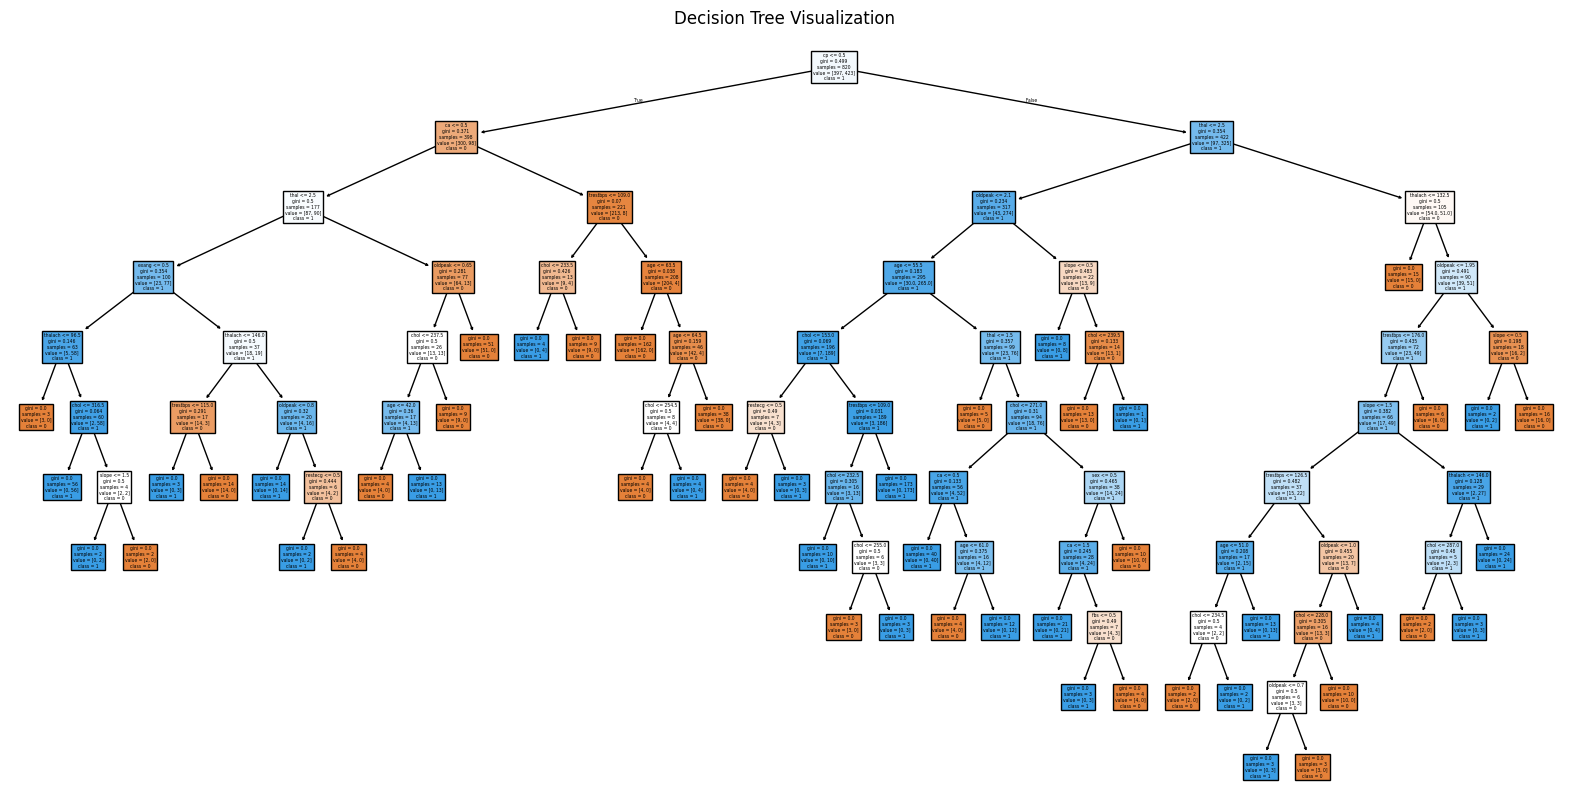

In [9]:
plt.figure(figsize=(20,10))
plot_tree(dt_model,
          filled=True,
          feature_names=X.columns,
          class_names=[str(cls) for cls in dt_model.classes_])  # Convert class labels to strings
plt.title("Decision Tree Visualization")
plt.show()



Decision Tree - Control Overfitting

In [10]:
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pred_pruned = dt_pruned.predict(X_test)
print("Pruned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))


Pruned Decision Tree Accuracy: 0.8


Random Forest Classifier

In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [12]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (RF):\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366

Classification Report (RF):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Feature Importance

In [13]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

Plot Feature Importance

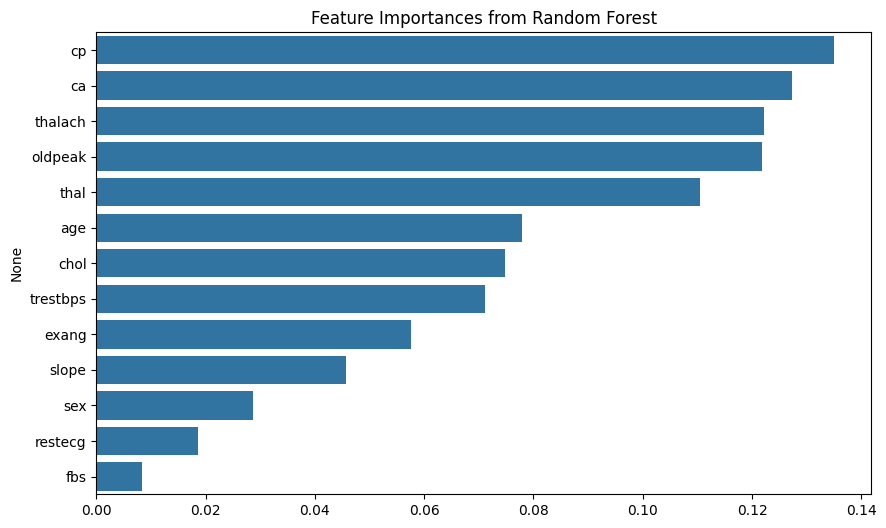

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importances from Random Forest")
plt.show()

Cross-Validation

In [15]:
cv_scores_dt = cross_val_score(dt_model, X, y, cv=5)
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5)

In [16]:
print("Decision Tree CV Accuracy: %.2f%%" % (cv_scores_dt.mean() * 100))
print("Random Forest CV Accuracy: %.2f%%" % (cv_scores_rf.mean() * 100))

Decision Tree CV Accuracy: 100.00%
Random Forest CV Accuracy: 99.71%
